# 데이터 및 결측치 확인

## 라이브러리 및 파일 불러오기

In [67]:
#필요한 라이브러리 불러오기
#데이터 핸들링을 위한 라이브러리

import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

#
!pip install IPython
from IPython.display import Image

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [68]:
data = pd.read_csv('./data/train.csv')

In [69]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'number6')

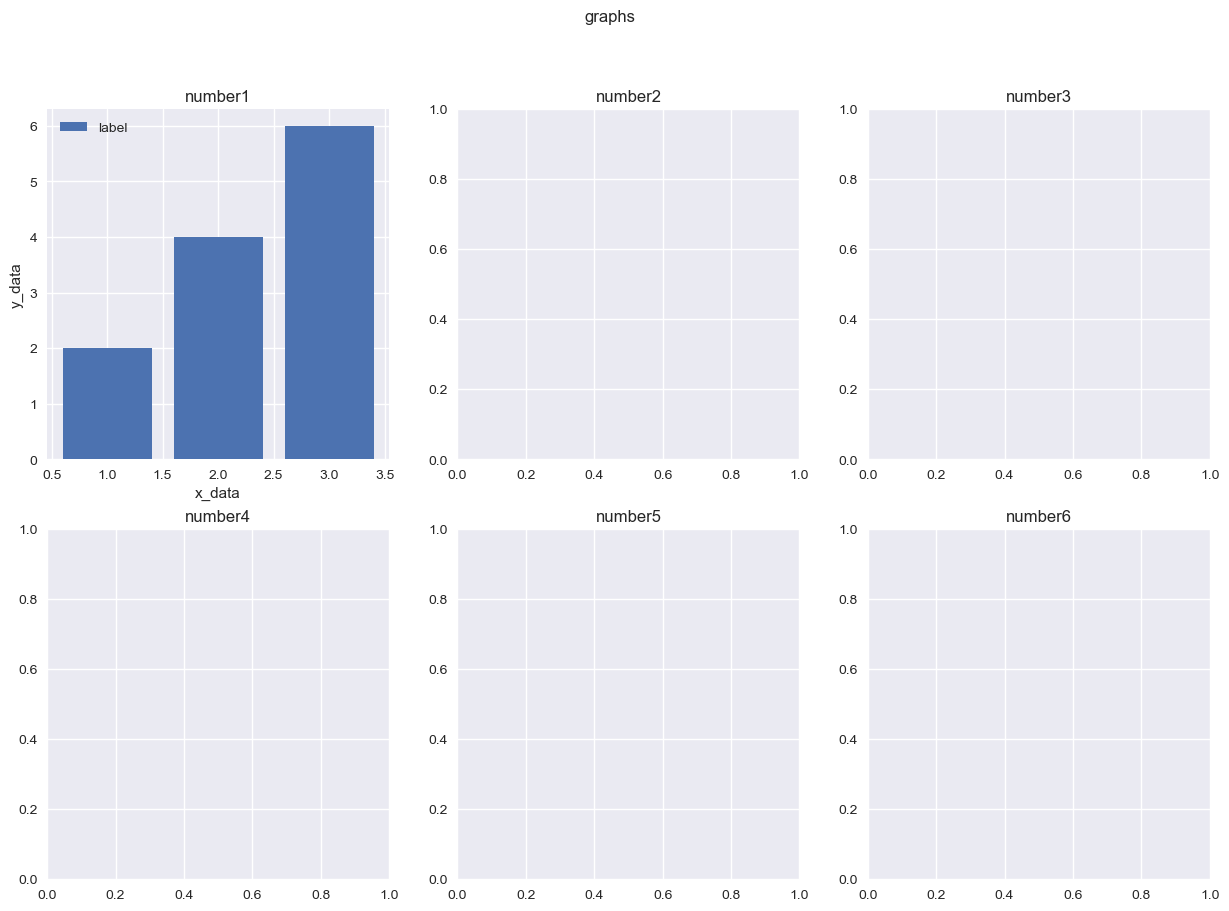

In [31]:
#데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

x = [1,2,3]
y = [2,4,6]
fig, ax = plt.subplots(2,3, figsize = (15,10))
fig.suptitle('graphs')


#1st graph
ax[0,0].bar(x,y, label = 'label')
ax[0,0].set_title('number1')
ax[0,0].legend()
ax[0,0].set(xlabel='x_data', ylabel='y_data')

#2nd graph
ax[0,1].set_title('number2')

#3rd graph
ax[0,2].set_title('number3')

#4th graph
ax[1,0].set_title('number4')

#5th graph
ax[1,1].set_title('number5')

#6th graph
ax[1,2].set_title('number6')

<Figure size 800x550 with 0 Axes>

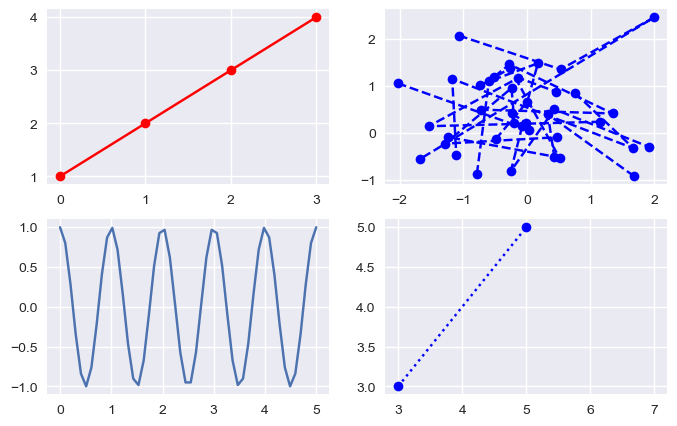

In [32]:
fig = plt.figure()
fig.suptitle('figure sample plots')

fig, ax_lst = plt.subplots(2, 2, figsize=(8,5))

# 시각화 스타일 설정

ax_lst[0][0].plot([1,2,3,4], 'ro-')
ax_lst[0][1].plot(np.random.randn(4, 10), np.random.randn(4,10), 'bo--')
ax_lst[1][0].plot(np.linspace(0.0, 5.0), np.cos(2 * np.pi * np.linspace(0.0, 5.0)))
ax_lst[1][1].plot([3,5], [3,5], 'bo:')
ax_lst[1][1].plot([3,7], [5,4], 'kx')
plt.show()



In [33]:
#graph 

parameters = {
    'axes.titlesize' : 25,
    'axes.labelsize' : 20,
    'ytick.labelsize' : 20,
}

plt.rcParams.update(parameters)

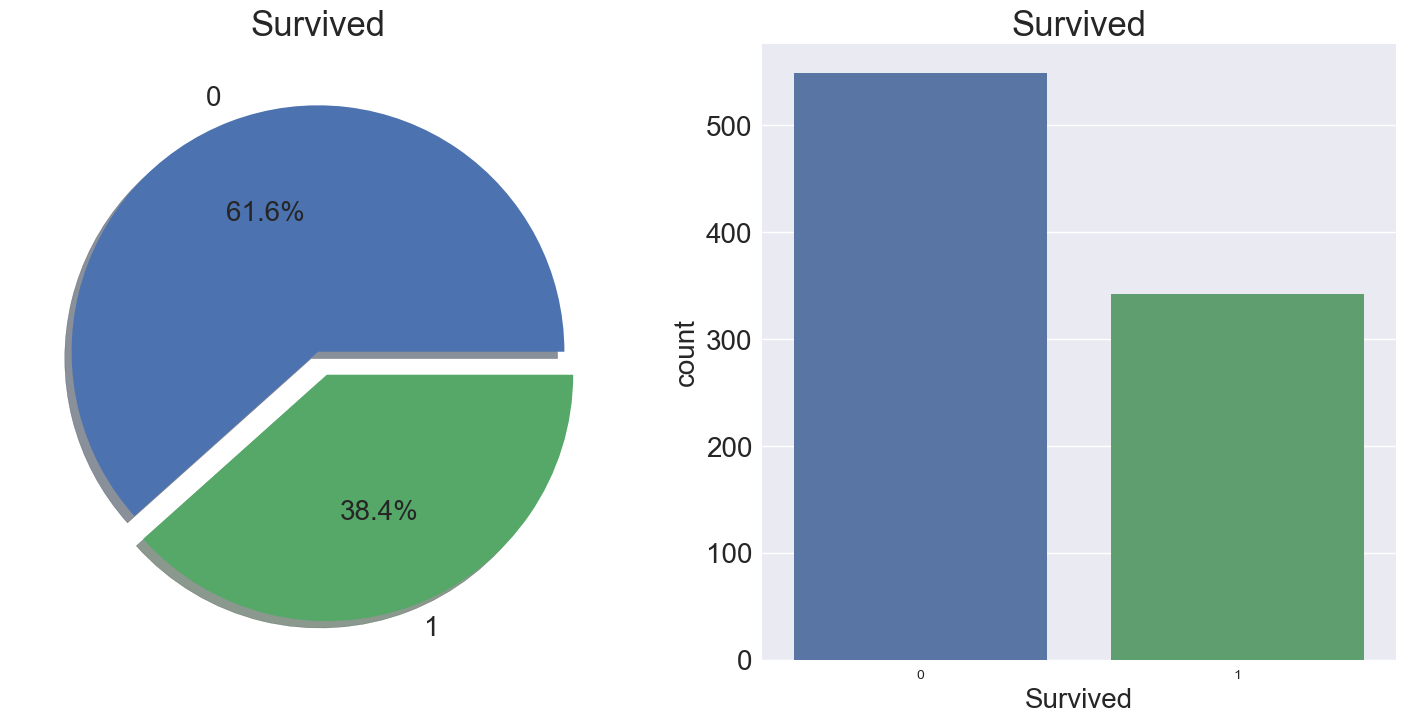

In [34]:
f, ax = plt.subplots(1,2, figsize = (18,8))

#pi chart
data['Survived'].value_counts().plot.pie(explode = [0,0.1],
                                        autopct = "%1.1f%%",
                                        ax = ax[0],
                                        shadow = True,
                                        fontsize =20)


ax[0].set_title('Survived')
ax[0].set_ylabel('')

#countplot
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

# 생존자 성별

In [35]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

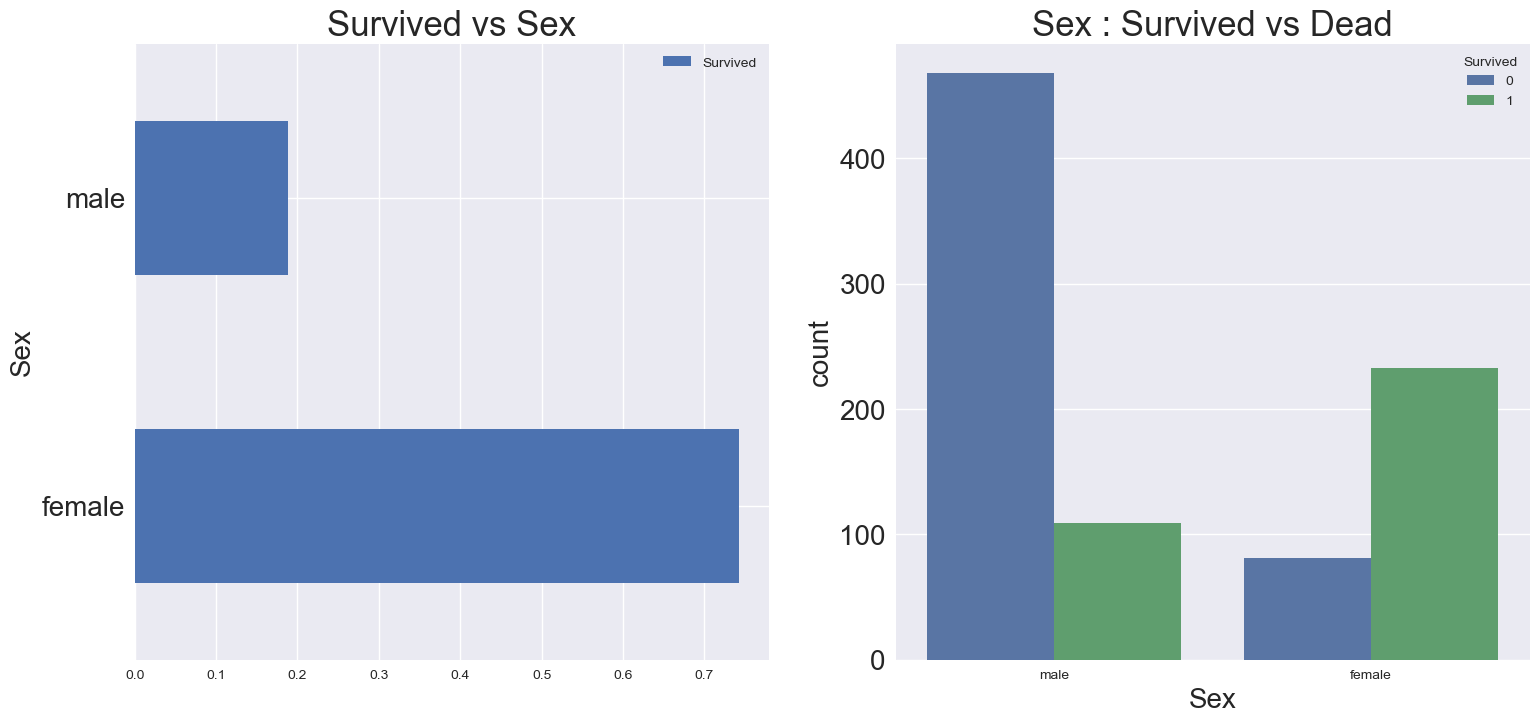

In [36]:
f, ax = plt.subplots(1, 2, figsize = [18,8])

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.barh(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Sex : Survived vs Dead')

plt.show()

In [37]:
#crosstab
pd.crosstab(data.Pclass,
           data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


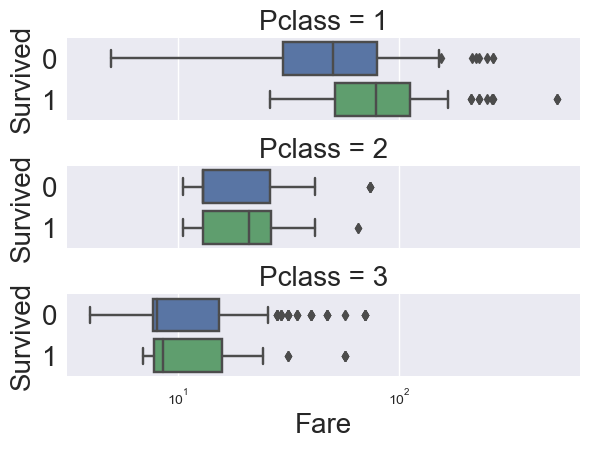

In [38]:
plot = sns.catplot(x="Fare", y="Survived", row="Pclass",
                  kind="box", orient="h", height=1.5, aspect=4,
                  data=data.query("Fare > 0"))

plot.set(xscale="log")

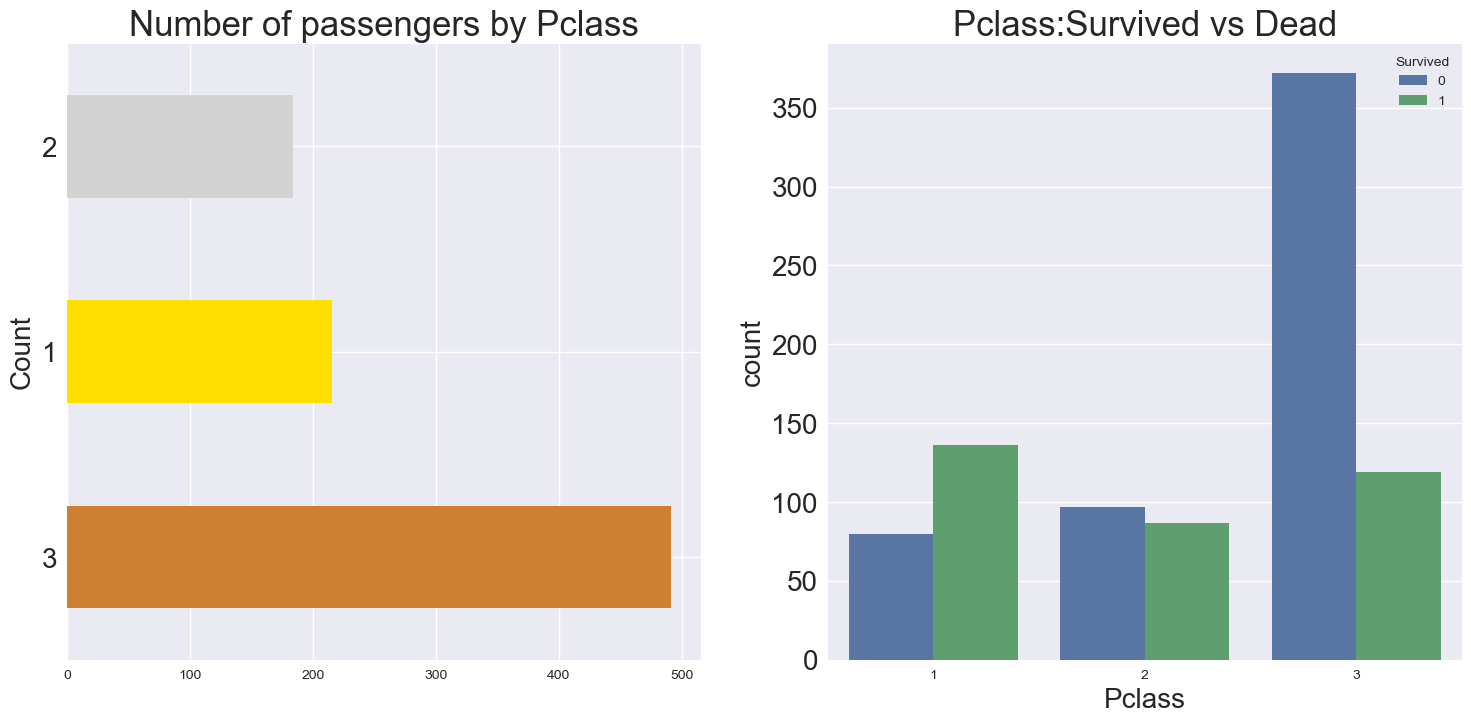

In [39]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 가로형 막대 그래프: barh
data['Pclass'].value_counts().plot.barh(
    color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])

ax[0].set_title('Number of passengers by Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [40]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

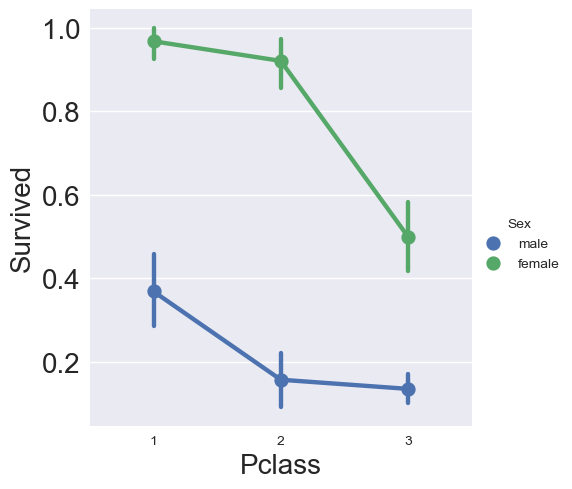

In [41]:
#factorplot

sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

In [42]:
print('Oldest passenger was of:', data['Age'].max(), 'Years') #max
print('Youngest Passegers was of:', data['Age'].min(), 'Years') #min
print('Average age on the ship: ', data['Age'].mean(), 'Years') #mean

Oldest passenger was of: 80.0 Years
Youngest Passegers was of: 0.42 Years
Average age on the ship:  29.69911764705882 Years


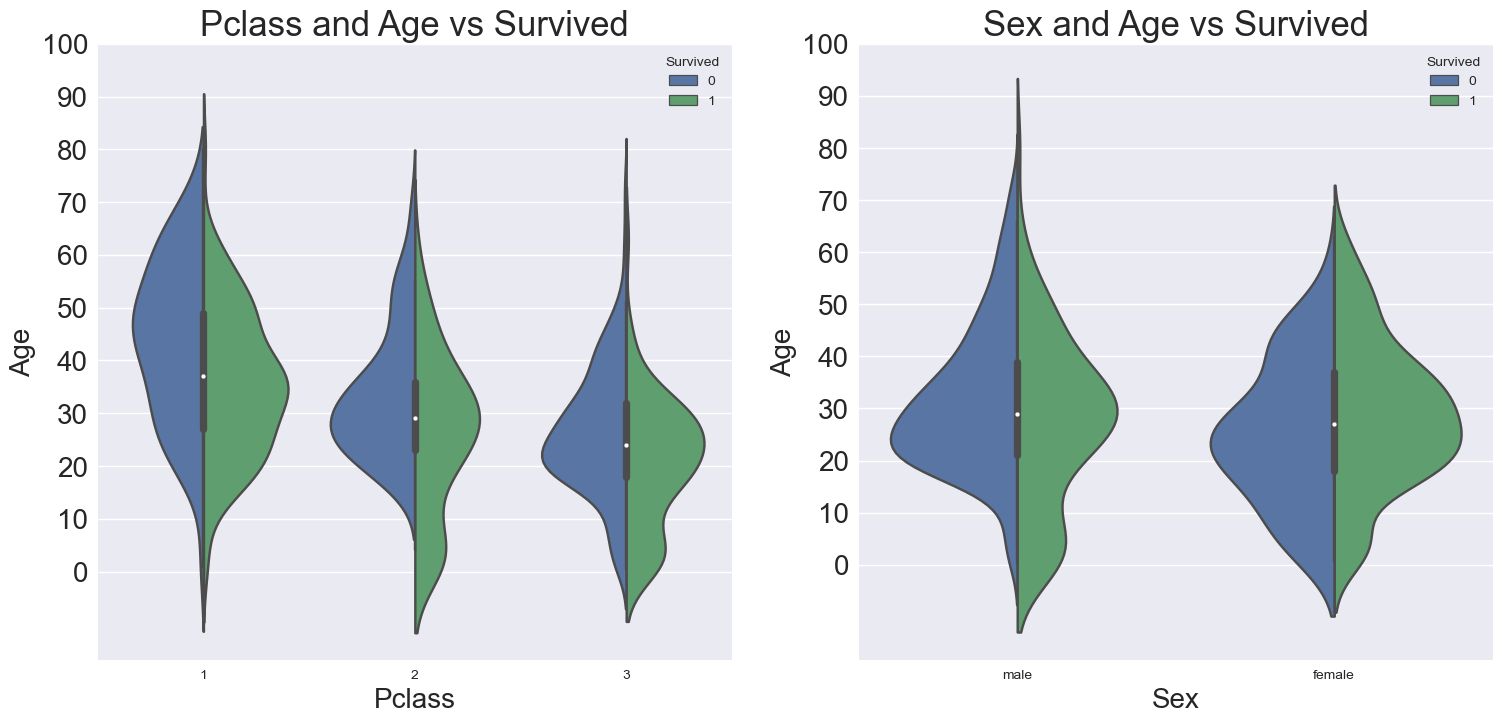

In [43]:
f, ax = plt.subplots(1,2, figsize=(18,8))

sns.violinplot('Pclass',
              'Age',
              hue = "Survived",
              data = data,
              split = True,
              ax = ax[0])

ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

#flot
sns.violinplot('Sex','Age',hue = "Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


In [70]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')  # salutation 추출

In [71]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(
    cmap='summer_r')  # Initials을 Sex와 함께 확인

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [73]:
data['Initial'].replace([
    'Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col',
    'Rev', 'Capt', 'Sir', 'Don'
], [
    'Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other',
    'Other', 'Mr', 'Mr', 'Mr'
],
                        inplace=True)

In [74]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

# age 결측값 채우기

In [75]:
# 결측값을 initial별 평균값으로 대체
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'), 'Age'] = 46

In [76]:
# 결측값 유무 확인
data.Age.isnull().any()

False

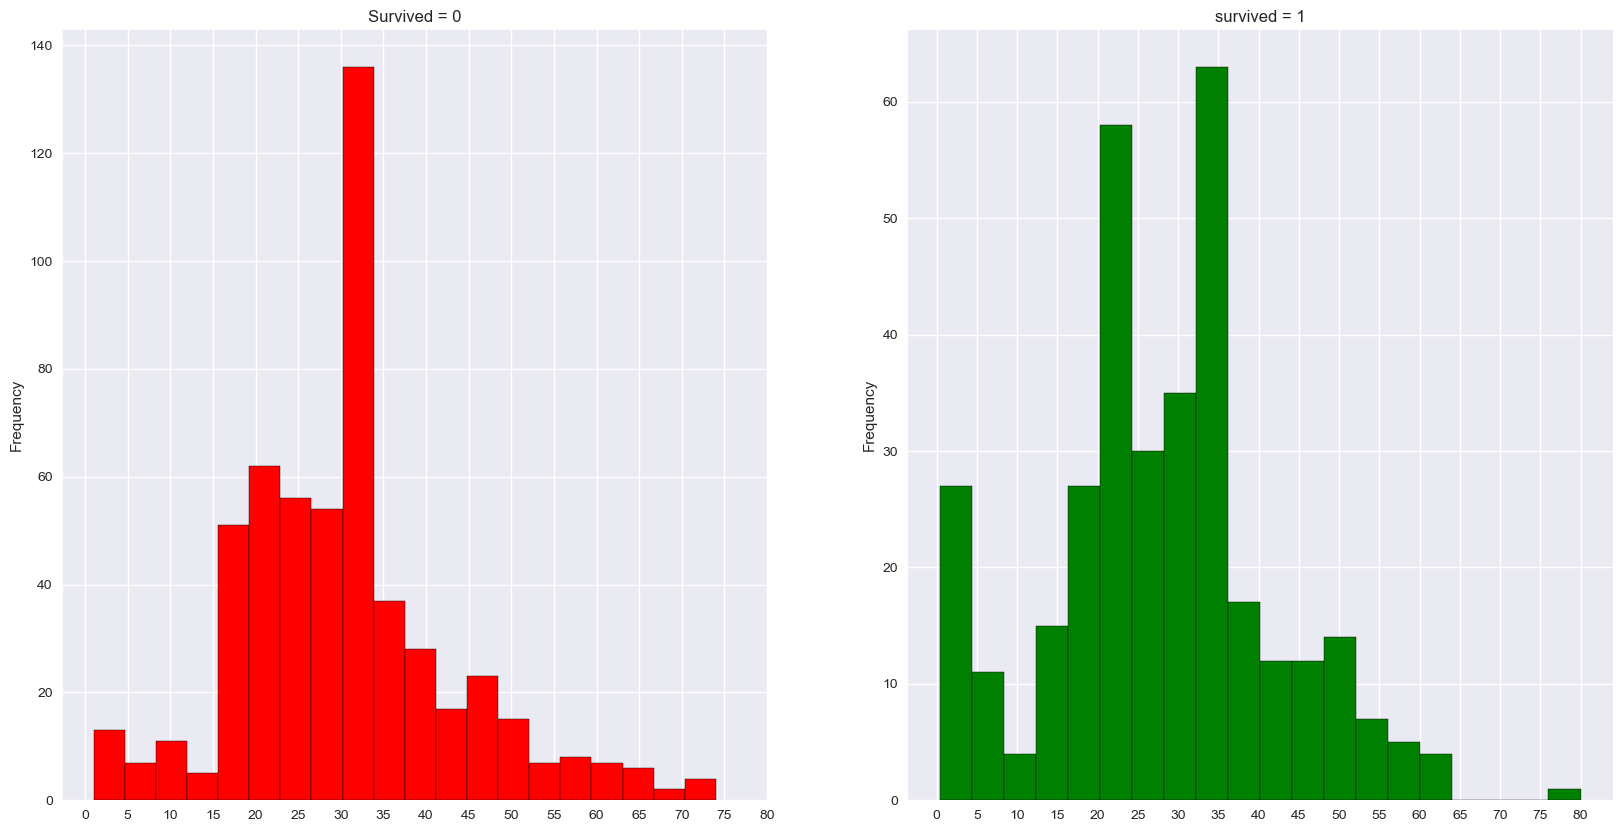

In [77]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

#히스토그램

data[data['Survived'] == 0].Age.plot.hist(ax=ax[0],
                                        bins = 20,
                                        edgecolor = 'black',
                                        color = 'red')

ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)


data[data['Survived'] == 1].Age.plot.hist(ax=ax[1],
                                         color = 'green',
                                         bins = 20,
                                         edgecolor = 'black')

ax[1].set_title('survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()


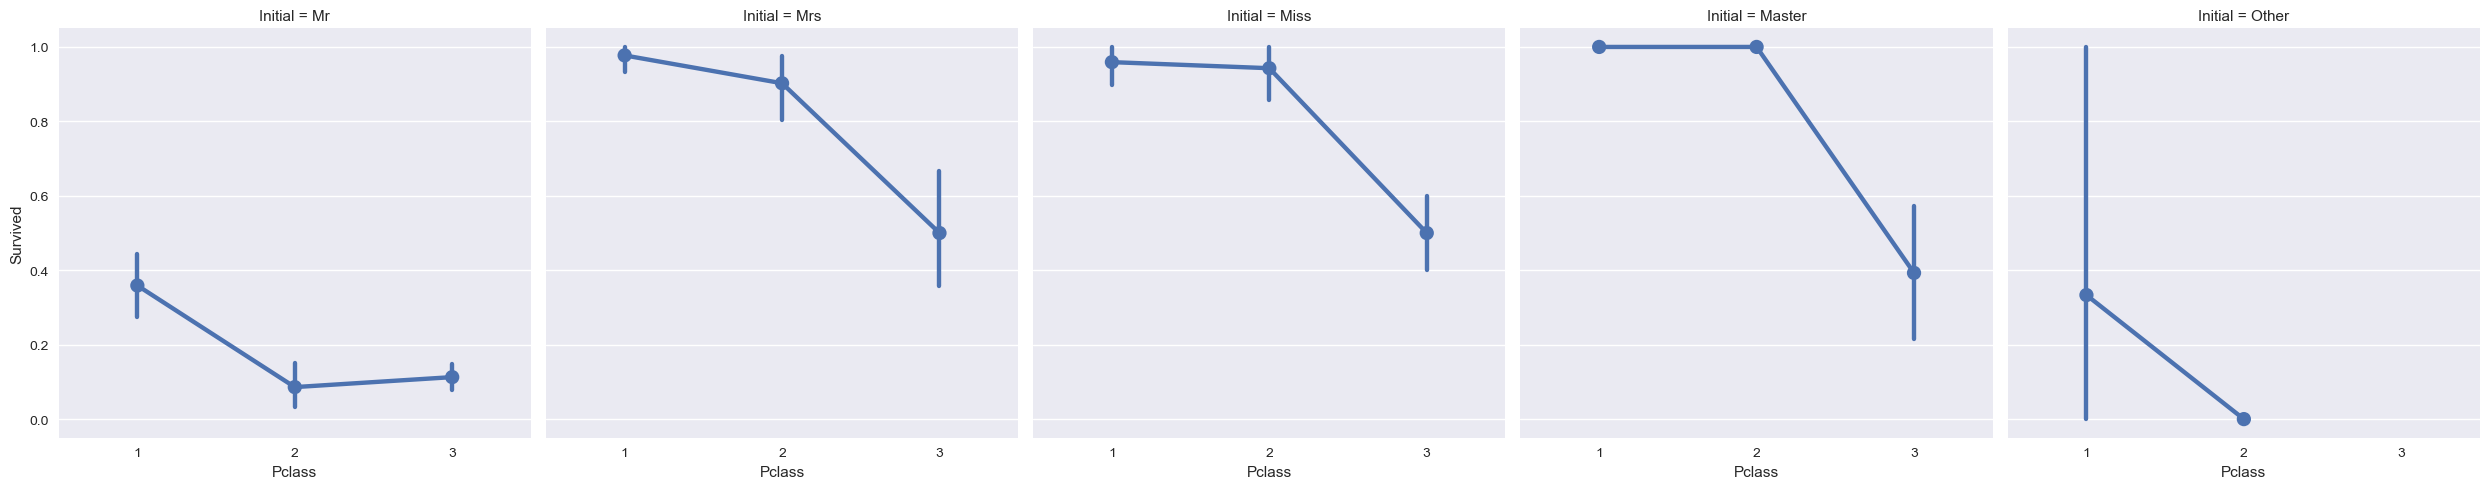

In [78]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)## Initial별 pclass, survived plot
plt.show()

## Embared : categorical value (facot/countplot)

In [80]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived],
            margins=True).style.background_gradient(cmap='summer_r')

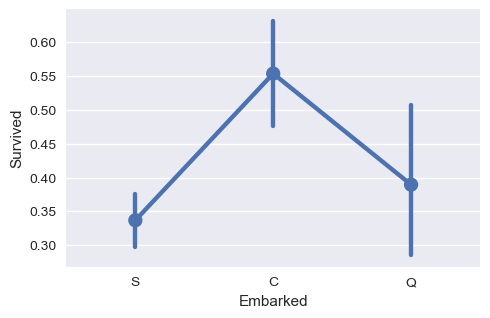

In [81]:
#factor plot

sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

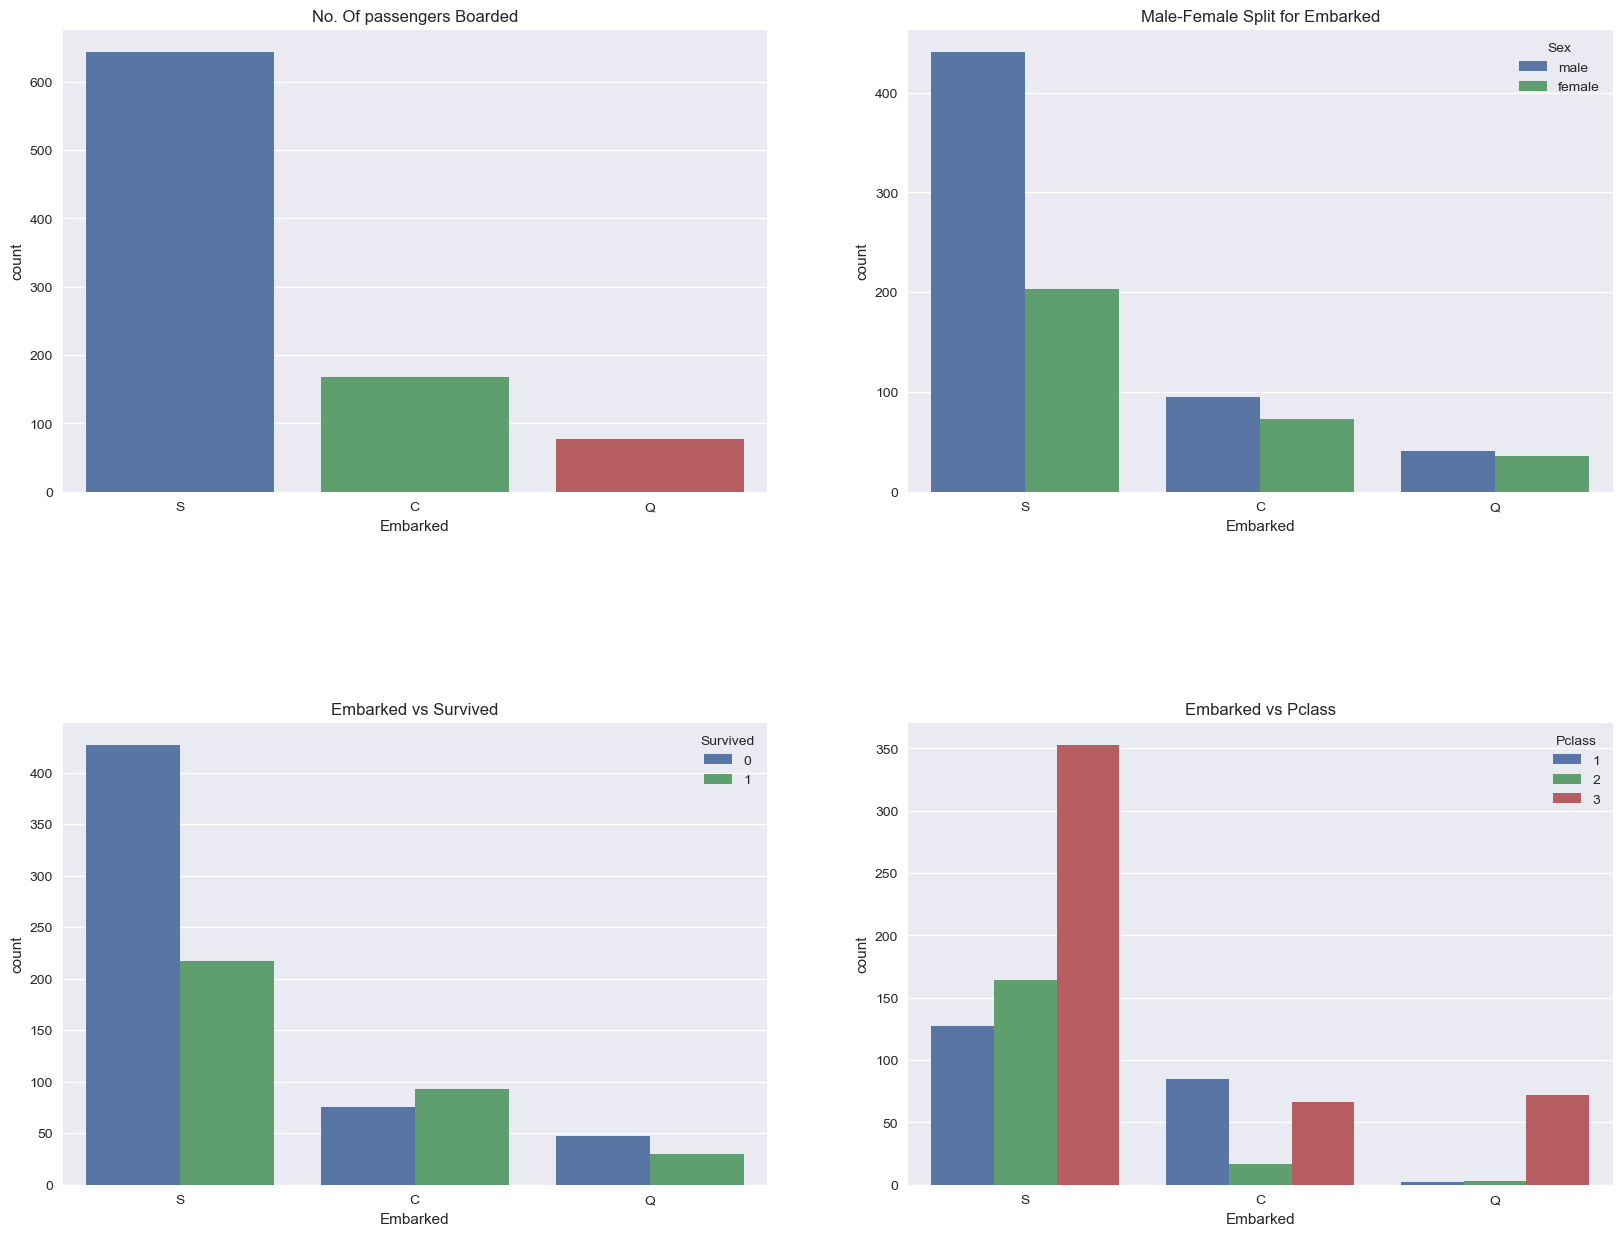

In [85]:
f, ax = plt.subplots(2,2, figsize=(20,15))

sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of passengers Boarded')
                                        
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue = 'Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

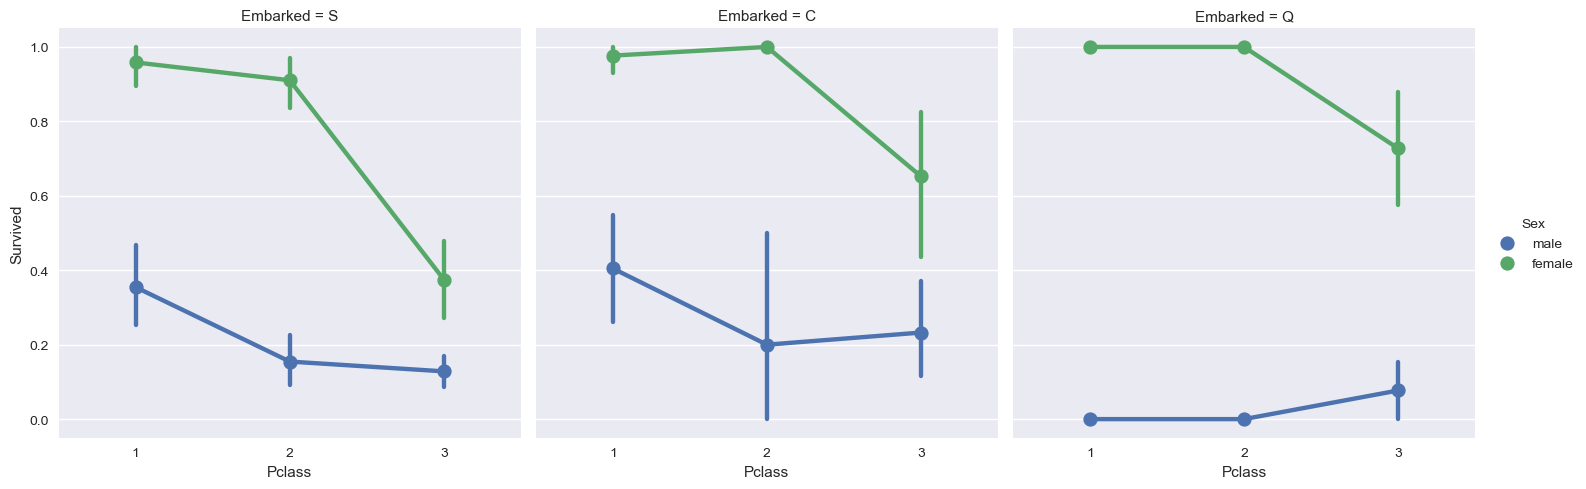

In [86]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data=data)
plt.show()

# Embarked

In [87]:
data['Embarked'].fillna('S', inplace=True)

In [88]:
data.Embarked.isnull().any()

False

# sibsp : discrete feature (bar/factorplot)

In [90]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


Text(0.5, 1.0, 'Sibsp vs Survived')

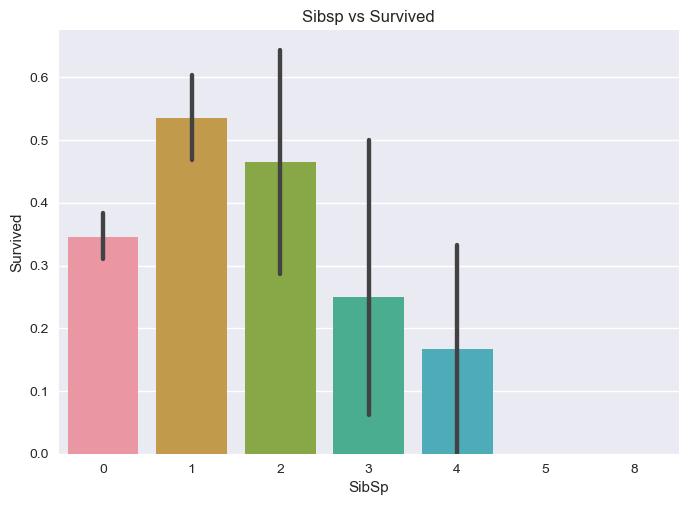

In [91]:
sns.barplot('SibSp', 'Survived', data=data)
plt.title('Sibsp vs Survived')

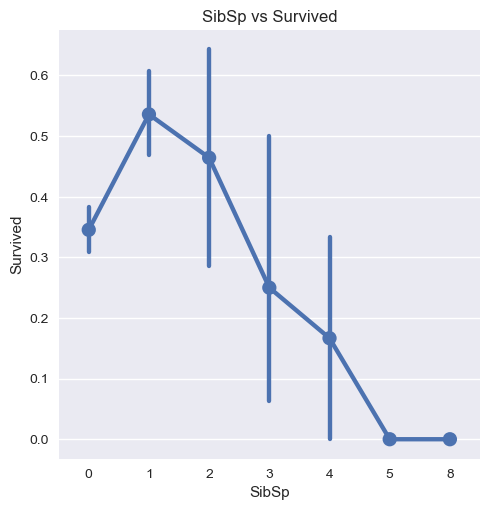

In [93]:
sns.factorplot('SibSp', 'Survived', data=data)
plt.title('SibSp vs Survived')
plt.show()

In [94]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


# Parch(Bar / FactorPlot)

In [95]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


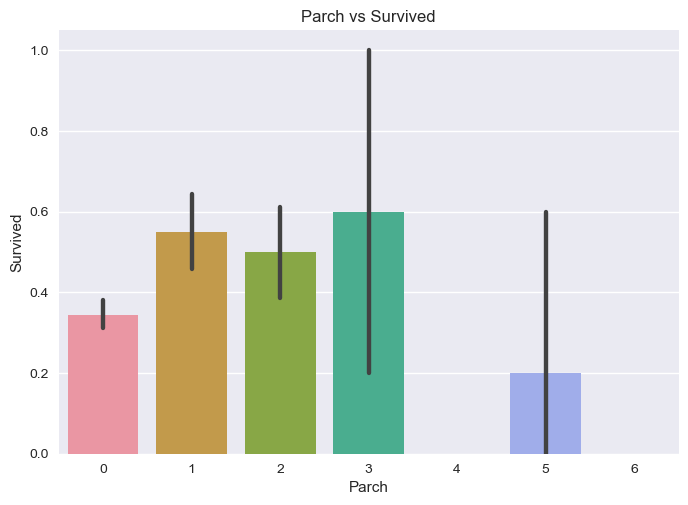

In [96]:
sns.barplot('Parch', 'Survived', data=data)
plt.title('Parch vs Survived')
plt.show()

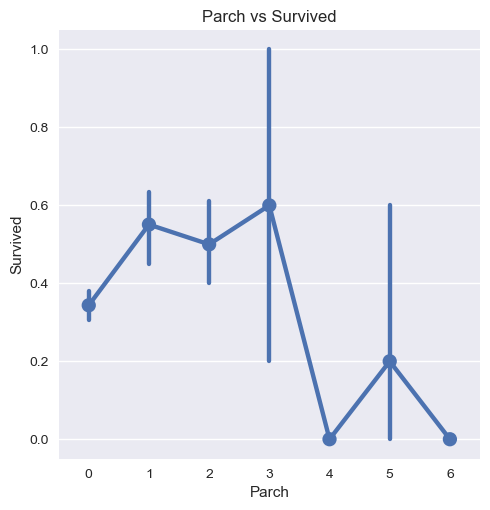

In [97]:
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
plt.title('Parch vs Survived')
plt.show()

In [98]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


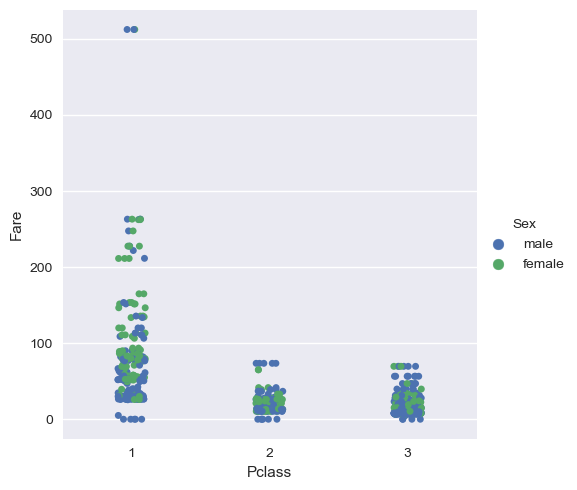

In [99]:
sns.catplot(x='Pclass', y = 'Fare', hue = 'Sex', data=data)

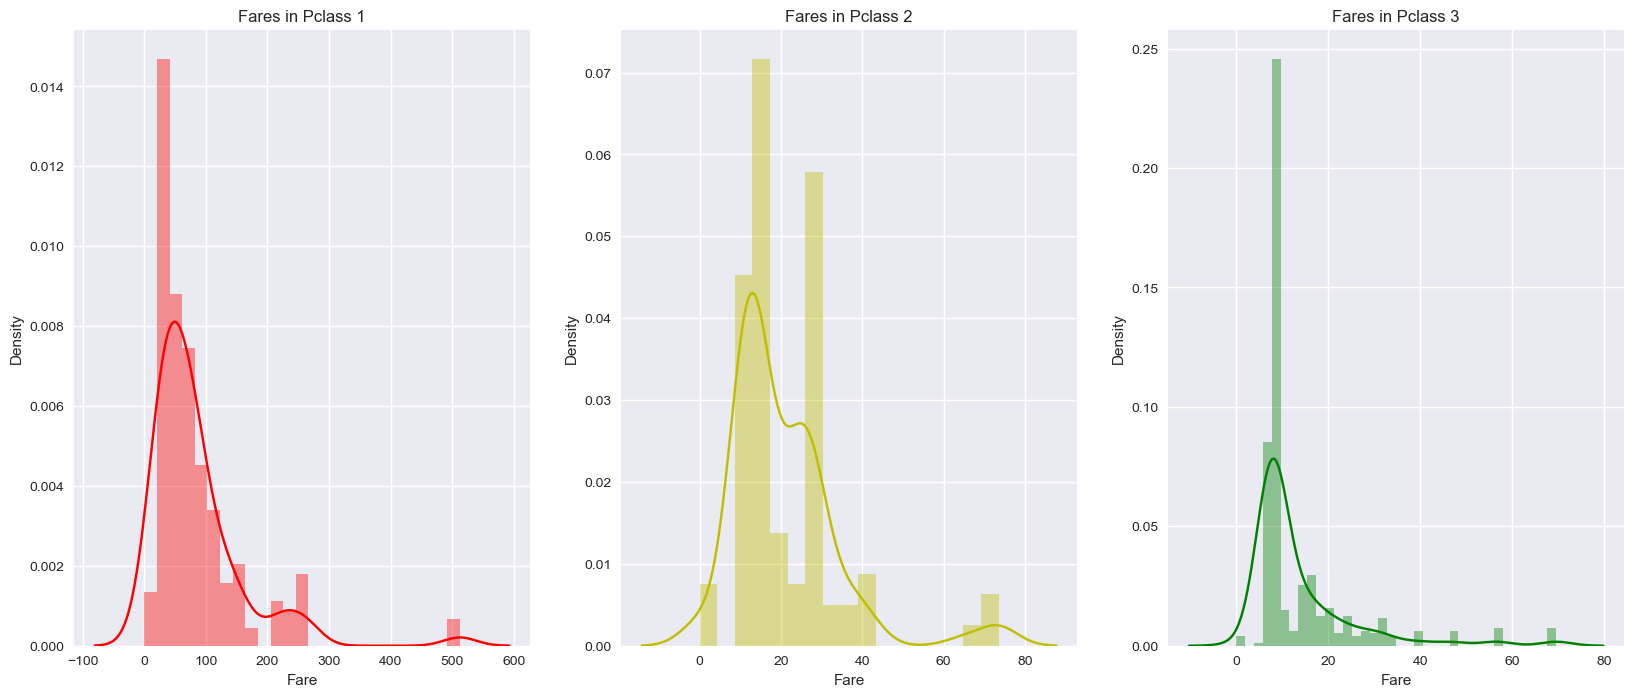

In [102]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# dist plot

sns.distplot(data[data['Pclass'] == 1].Fare, ax=ax[0], color='r')
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1], color='y')
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2], color='g')
ax[2].set_title('Fares in Pclass 3')

plt.show()

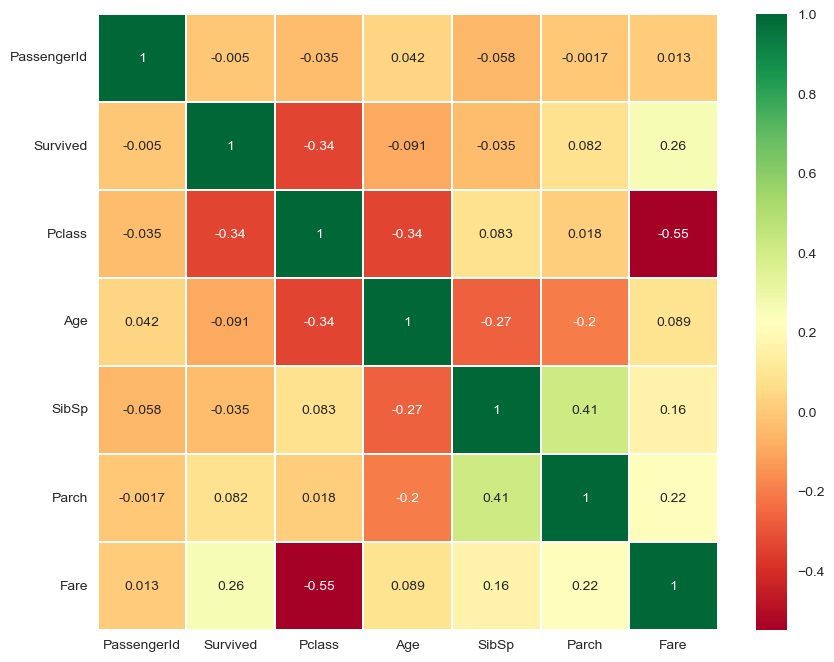

In [103]:
sns.heatmap(data.corr(), annot=True, cmap = 'RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()


# feature engineering & data cleaning

In [105]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [106]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap = 'summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


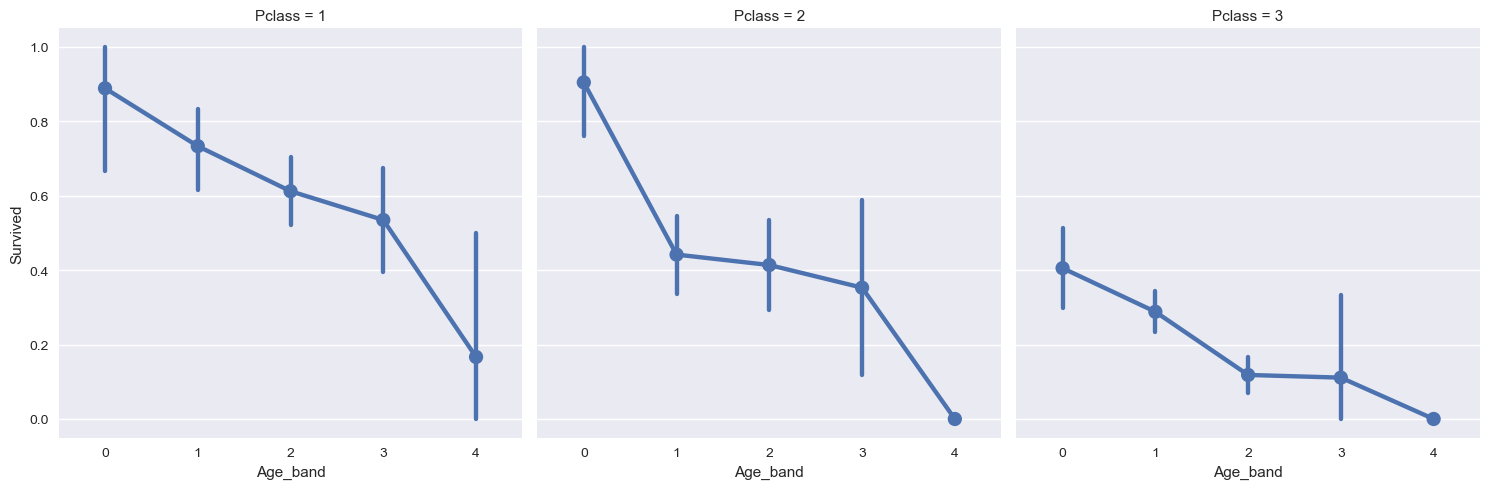

In [107]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

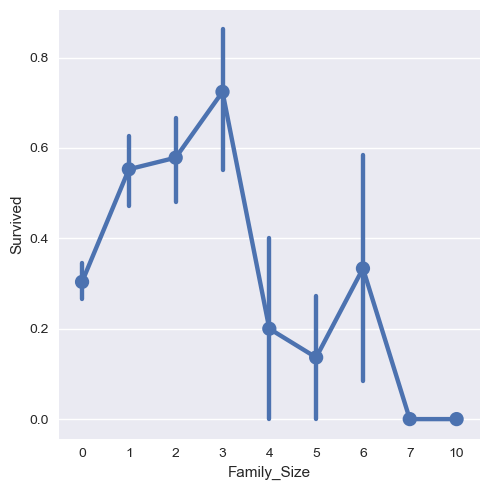

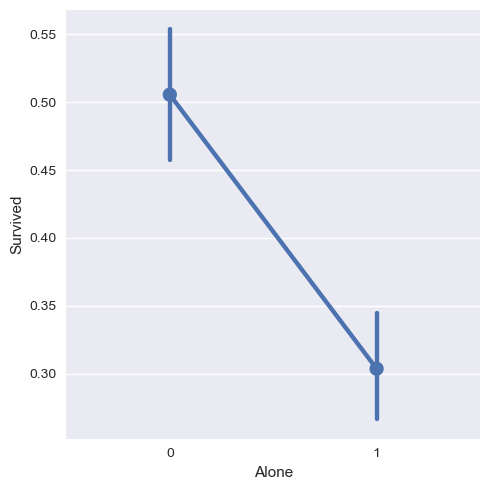

In [110]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1

sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()

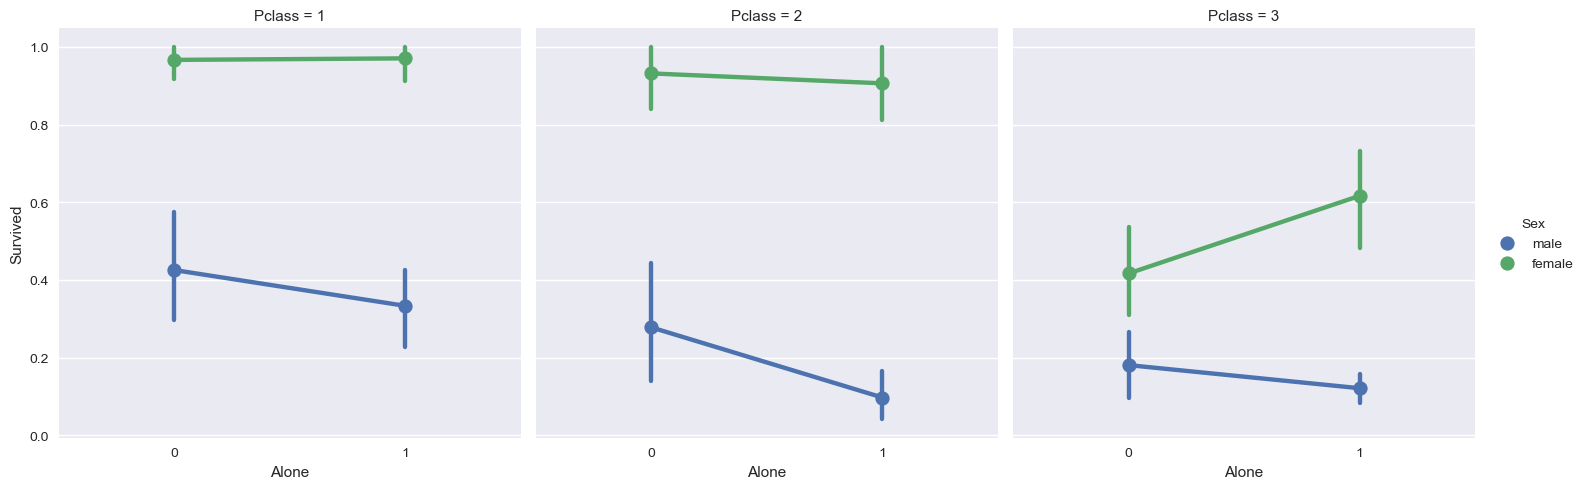

In [111]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

# Fare_range

In [113]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4) #네개로 나눠주겠다
data.groupby([
    'Fare_Range'
])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [114]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

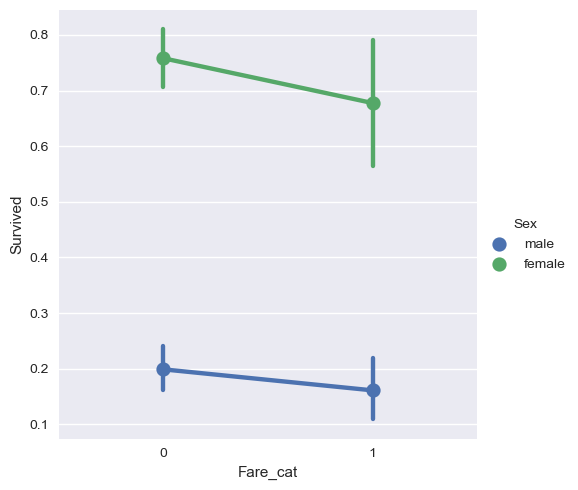

In [115]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

# Converting string values into numeric

In [117]:
data['Sex'].replace(['male', 'female'], [0,1], inplace = True)
data['Embarked'].replace(['S','C','Q'], [0,1,2], inplace = True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'],
                       [0,1,2,3,4],
                       inplace = True)


In [119]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial', 'Age_band',
       'Family_Size', 'Alone', 'Fare_Range', 'Fare_cat'],
      dtype='object')

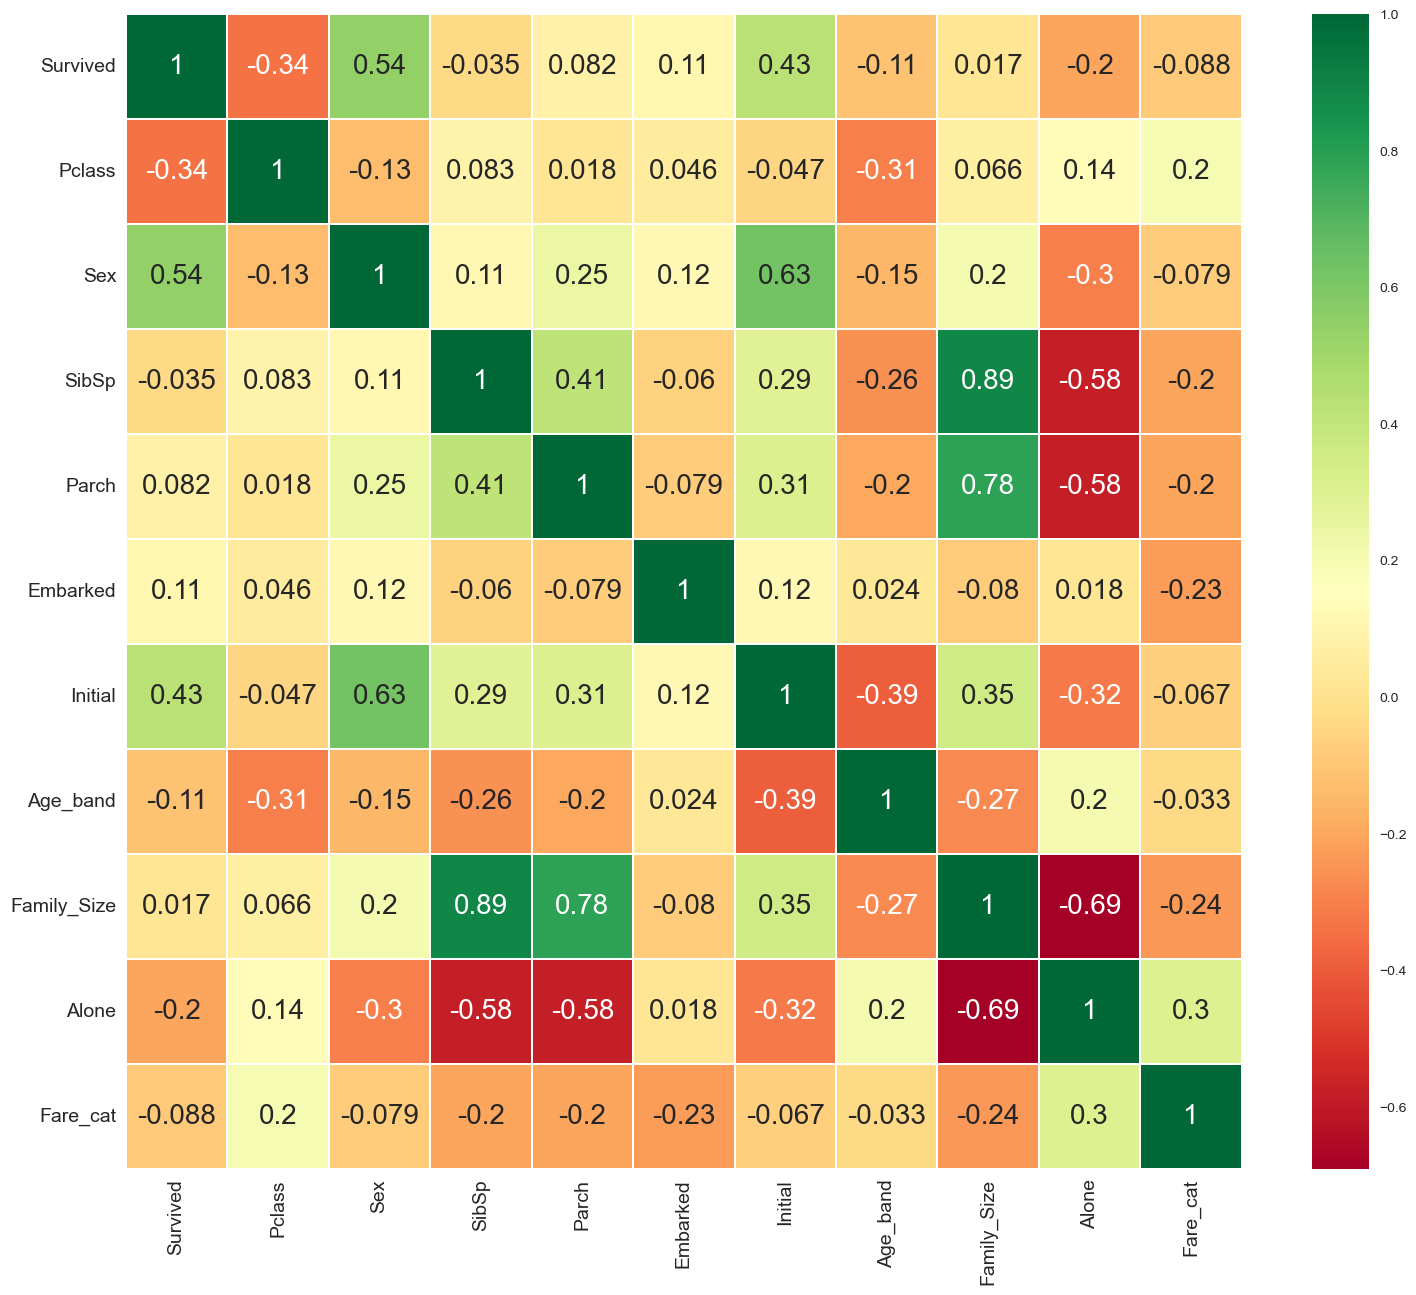

In [126]:
data.drop(
    ['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'],
    axis=1,
    inplace=True)
sns.heatmap(data.corr(), ## data의 feature에서 correlation heatmap
            annot=True,
            cmap='RdYlGn',
            linewidths=0.2,
            annot_kws={'size': 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [131]:
df=pd.DataFrame(np.random.randn(10,4).cumsum(axis=0), columns=['A','B','C','D'], index=np.arange(0,100,10))
df

,A,B,C,D
0,-1.251855,0.331977,-0.054534,0.005186
10,-2.499736,-1.932867,1.271974,-0.349474
20,-2.061589,-1.630090,0.211199,0.138997
30,-0.915103,-1.009554,-0.813875,-0.350672
40,-1.054069,-1.467313,0.014739,-1.020768
50,-0.400022,-1.547342,1.495413,-0.828084
60,-1.213922,-1.492352,0.921139,-0.282068
70,-1.459351,0.105281,0.943938,1.167442
80,-2.492880,1.166507,1.109646,1.463605
90,-3.185400,1.483780,0.978605,1.345255


<AxesSubplot:>

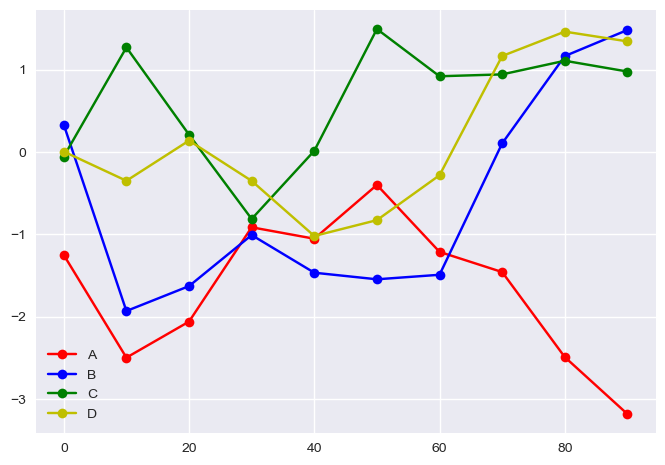

In [132]:
df.plot(marker = 'o', color = ['r','b','g','y'])

In [133]:
iris = sns.load_dataset("iris") #iris 데이터
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


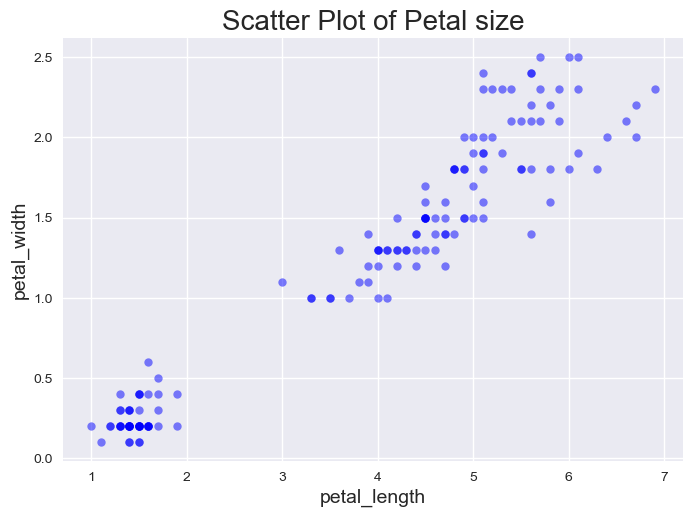

In [136]:
plt.plot('petal_length',  # x
         'petal_width',  # y
         data=iris,
         linestyle='none', 
         marker='o', 
         markersize=6,
         color='blue', 
         alpha=0.5)

plt.title('Scatter Plot of Petal size', fontsize=20)
plt.xlabel('petal_length', fontsize=14)
plt.ylabel('petal_width', fontsize=14)
plt.show()

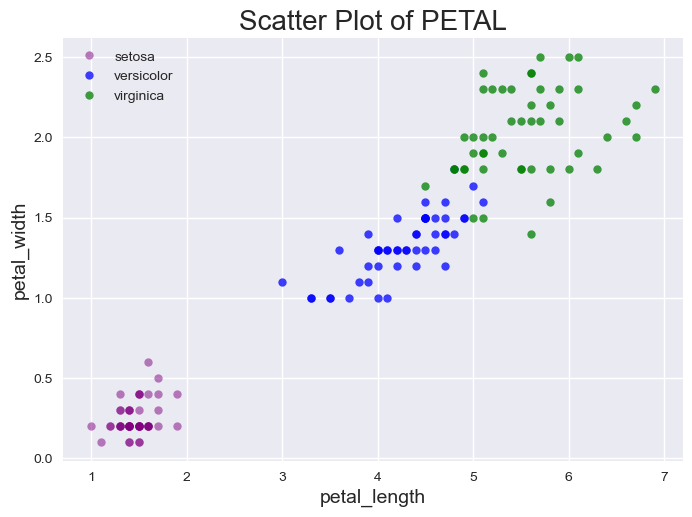

In [138]:
plt.plot('petal_length',  # x
         'petal_width',  # y
         data=iris[iris['species']=='setosa'],
         linestyle='none', 
         marker='o', 
         markersize=6,
         color='purple', 
         alpha=0.5)

plt.plot('petal_length',  # x
         'petal_width',  # y
         data=iris[iris['species']=='versicolor'],
         linestyle='none', 
         marker='o', 
         markersize=6,
         color='blue', 
         alpha=0.75)

plt.plot('petal_length',  # x
         'petal_width',  # y
         data=iris[iris['species']=='virginica'],
         linestyle='none', 
         marker='o', 
         markersize=6,
         color='green', 
         alpha=0.75)
plt.title('Scatter Plot of PETAL', fontsize=20)
plt.xlabel('petal_length', fontsize=14)
plt.ylabel('petal_width', fontsize=14)
plt.legend(['setosa','versicolor', 'virginica'])
plt.show()

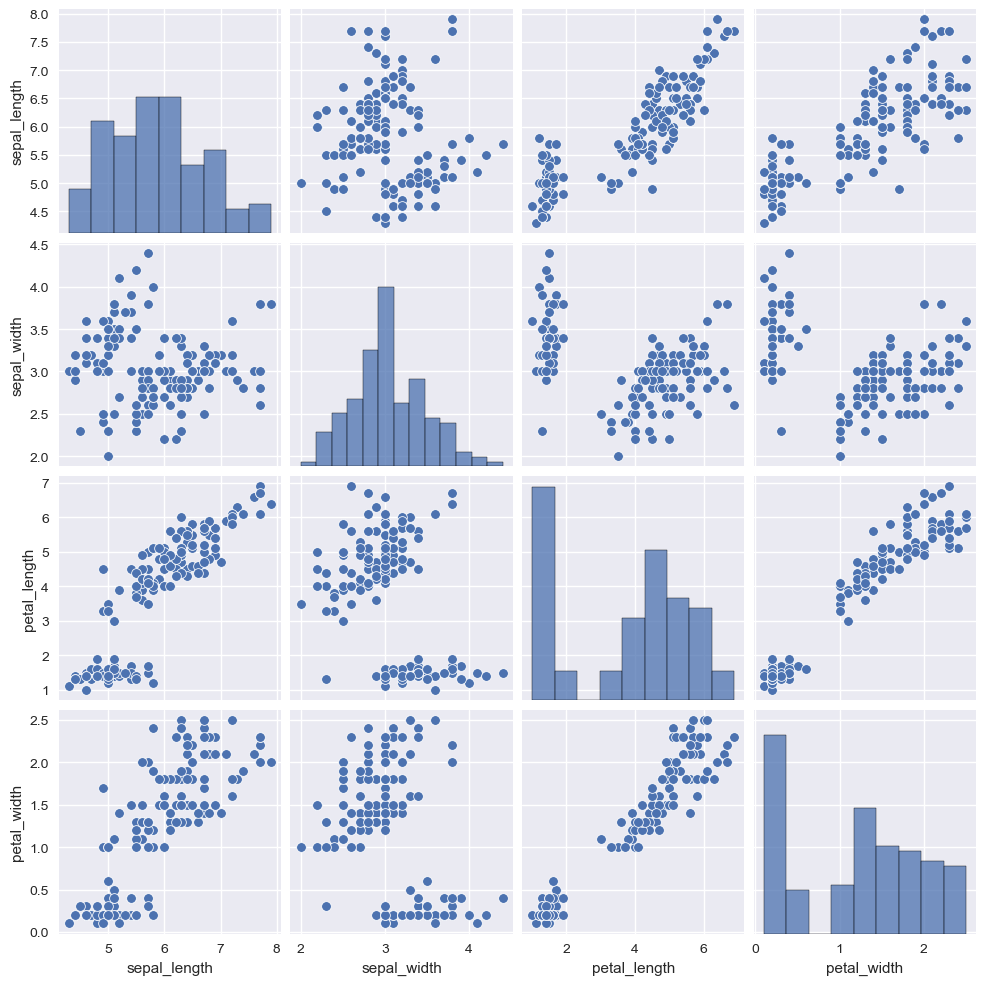

In [139]:
sns.pairplot(iris)

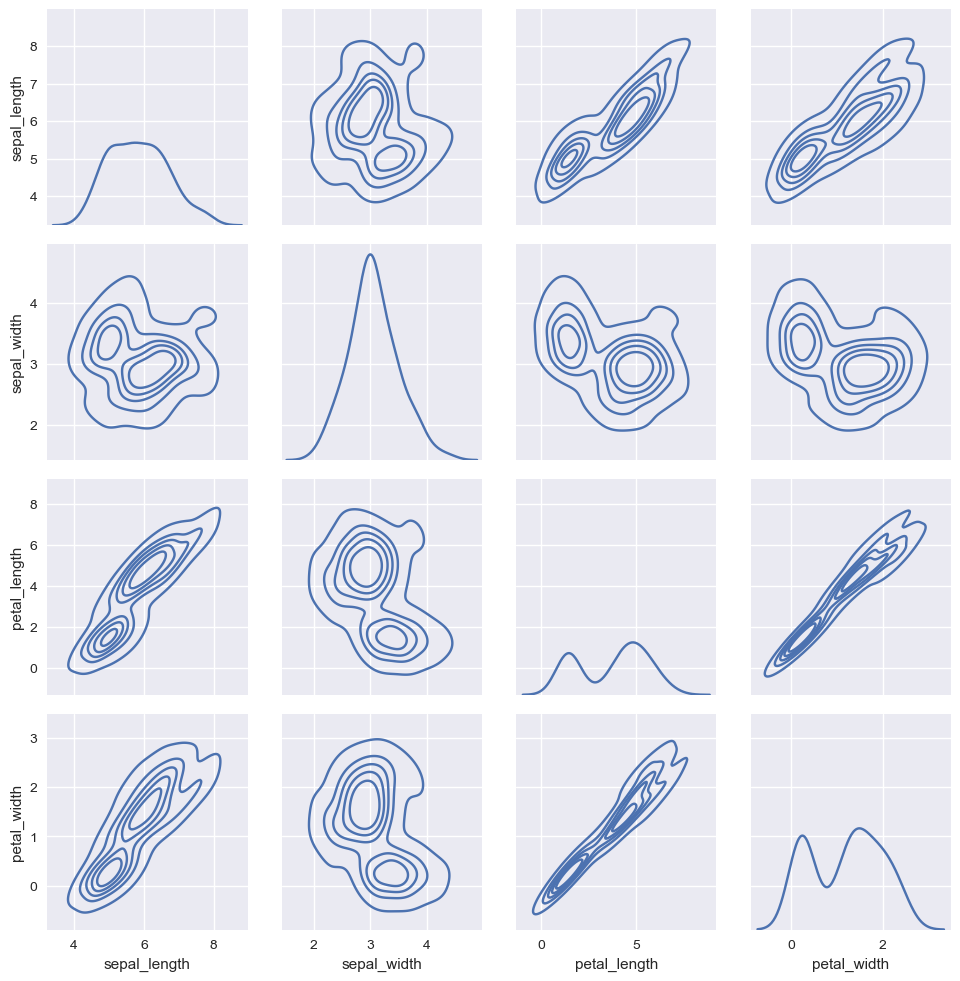

In [140]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

# 데이터 전처리 scaling 시각화

In [141]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [143]:
import numpy as np

fish_data= np.column_stack((fish_length, fish_weight))
fish_target= np.concatenate((np.ones(35), np.zeros(14)))
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

Text(0, 0.5, 'weight')

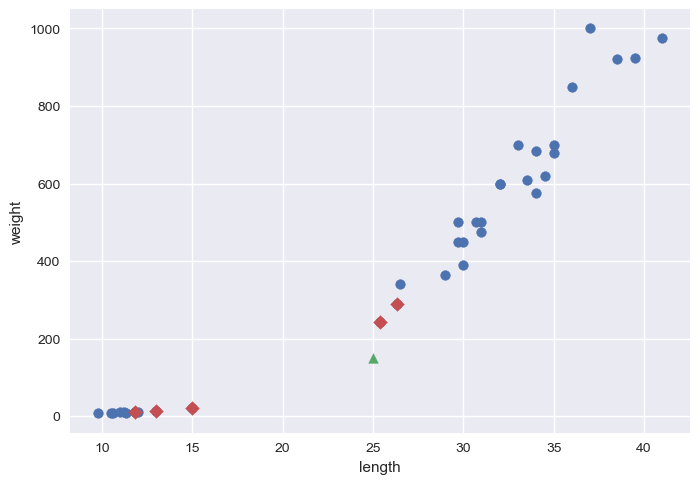

In [144]:
distances, indexes = kn.kneighbors([[25,150]])

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')

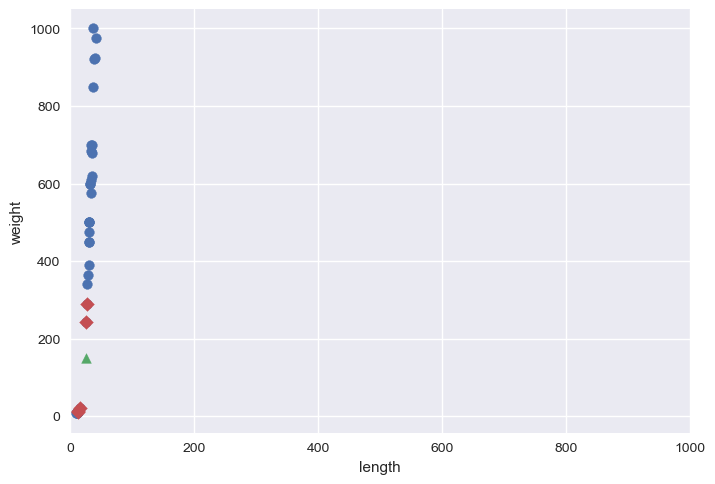

In [146]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [148]:
mean = np.mean(train_input, axis = 0)
std=np.std(train_input, axis = 0)

In [149]:
print(mean, std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [150]:
train_scaled = (train_input-mean)/std

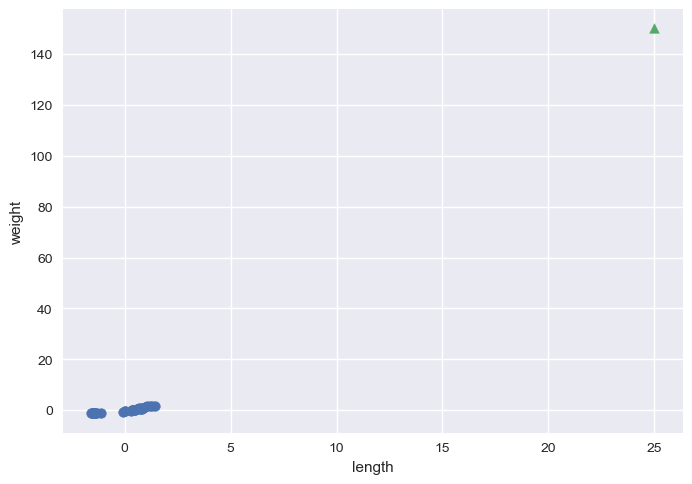

In [152]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel("length")
plt.ylabel('weight')
plt.show()

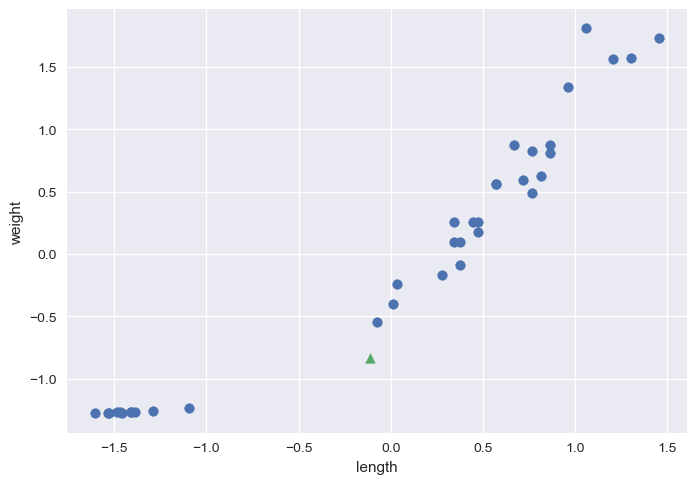

In [153]:
new = ([25,150]-mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
